[IPython Notebook](sun.ipynb) |  [Python Script](sun.py)

Sun (single rotating star)
============================

**NOTE: single stars are not officially supported yet and may be broken**

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [17]:
%matplotlib inline

In [18]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_star(starA='sun')

Setting Parameters
-----------------------

In [19]:
print b['sun']

ParameterSet: 17 parameters
             rpole@sun@component: 1.0 solRad
*              pot@sun@component: 1.0
              teff@sun@component: 10000.0 K
              abun@sun@component: 0.0
           syncpar@sun@component: 1.0
            period@sun@component: 1.0 d
*             freq@sun@component: 6.283185 rad / d
              incl@sun@component: 90.0 deg
         gravb_bol@sun@component: 1.0
     frac_refl_bol@sun@component: 0.6
*    frac_lost_bol@sun@component: 0.4
       ld_func_bol@sun@component: logarithmic
     ld_coeffs_bol@sun@component: [ 0.5  0.5]
              mass@sun@component: 1.0 solMass
                 freq@constraint: 6.283185 / {period@sun@component}
        frac_lost_bol@constraint: 1.000000 - {frac_refl_bol@sun@component}
                  pot@constraint: rotstarrpole2potential({rpole@sun@component}, {freq@sun@component})


Let's set all the values of the sun based on the nominal solar values provided in the units package.

In [20]:
b.set_value('teff', 1.0*u.solTeff)
b.set_value('rpole', 1.0*u.solRad)
b.set_value('mass', 1.0*u.solMass)
b.set_value('period', 24.47*u.d)


Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_b

And so that we can compare with measured/expected values, we'll observe the sun from the earth - with an inclination of 23.5 degrees and at a distance of 1 AU.

In [21]:
b.set_value('incl', 23.5*u.deg)
b.set_value('distance', 1.0*u.AU)

Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00


Checking on the set values, we can see the values were converted correctly to PHOEBE's internal units.

In [22]:
print b.get_quantity('teff')
print b.get_quantity('rpole')
print b.get_quantity('mass')
print b.get_quantity('period')
print b.get_quantity('incl')
print b.get_quantity('distance')

5772.0 K
1.0 solRad
1.0 solMass
24.47 d
23.5 deg
1.495978707e+11 m


Running Compute
--------------------

Let's add a light curve so that we can compute the flux at a single time and compare it to the expected value.  We'll set the passband luminosity to be the nominal value for the sun.

In [23]:
b.add_dataset('lc', pblum=1*u.solLum)

Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:32 PARAMETERS   WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00


<ParameterSet: 10 parameters | kinds: lc, lc_dep>

Now we run our model and store the mesh so that we can plot the temperature distributions and test the size of the sun verse known values.

In [24]:
b.run_compute(protomesh=True, pbmesh=True, distortion_method='rotstar', reflection_method='none')

Wed, 21 Sep 2016 18:32 BUNDLE       WARNING Object probably has a convective atm (teff=1K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00


<ParameterSet: 54 parameters | kinds: mesh, lc>

Comparing to Expected Values
--------------------------------

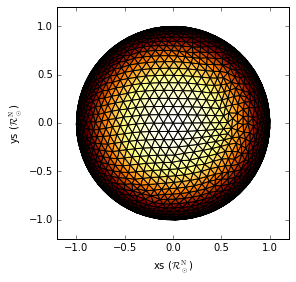

In [25]:
axs, artists = b['protomesh'].plot(facecolor='teffs')

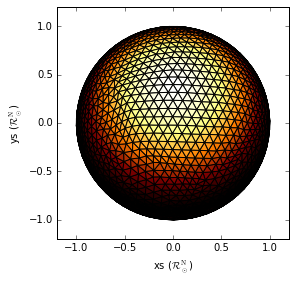

In [26]:
axs, artists = b['pbmesh'].plot(facecolor='teffs')

In [27]:
print "teff: {} ({})".format(b.get_value('teffs', dataset='pbmesh').mean(), 
                             b.get_value('teff', context='component'))

teff: 5771.99999728 (5772.0)


In [28]:
print "rpole: {} ({})".format(b.get_value('rpole', dataset='pbmesh'), 
                              b.get_value('rpole', context='component'))

rpole: 1.0 (1.0)


For a rotating sphere, the minimum radius should occur at the pole and the maximum should occur at the equator.

In [29]:
print "rmin (pole): {} ({})".format(b.get_value('rs', dataset='pbmesh').min(), 
                             b.get_value('rpole', context='component'))

rmin (pole): 1.00000000103 (1.0)


In [30]:
print "rmax (equator): {} (>{})".format(b.get_value('rs', dataset='pbmesh').max(), 
                              b.get_value('rpole', context='component'))

rmax (equator): 1.00000028355 (>1.0)


In [31]:
print "logg: {}".format(b.get_value('loggs', dataset='pbmesh').mean())

logg: 4.4380672978


In [32]:
print "flux: {}".format(b.get_quantity('fluxes@model')[0])

flux: 1359.46088782 W / m2
